Mnist Dataset

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Lambda, Flatten

In [3]:
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
from tensorflow.keras.datasets import mnist

In [5]:
(X,y),(testX,testy) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [6]:
print(f"Shape Of Training Data : {X.shape}")
print(f"Shape Of Testing Data : {testX.shape}")

Shape Of Training Data : (60000, 28, 28)
Shape Of Testing Data : (10000, 28, 28)


In [7]:
print(f"Shape Of Target Data : {y.shape}")
print(f"Shape Of target Data : {testy.shape}")

Shape Of Target Data : (60000,)
Shape Of target Data : (10000,)


In [0]:
X = X.astype('float32')
testX = testX.astype('float32')

In [0]:
# Convert train dataset to (num_images, img_row,img_col) format

In [0]:
X = X.reshape(X.shape[0], 28, 28)

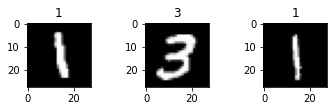

In [11]:
for i in range(6,9):
  plt.subplot(330 + (i+1))
  plt.imshow(X[i], cmap=plt.get_cmap('gray'))
  plt.title(y[i])

In [0]:
# Expand 1 more dimention as 1 for color channel gray 

In [0]:
X = X.reshape(X.shape[0], 28, 28, 1)
testX = testX.reshape(testX.shape[0], 28, 28, 1)

In [14]:
print(f"Shape Of Training Data : {X.shape}")
print(f"Shape Of Testing Data : {testX.shape}")

Shape Of Training Data : (60000, 28, 28, 1)
Shape Of Testing Data : (10000, 28, 28, 1)


In [0]:
# One Hot Encoding of Labels

In [0]:
from keras.utils.np_utils import to_categorical
y = to_categorical(y)
num_classes = y.shape[1]

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


([<matplotlib.axis.XTick at 0x7f96b272b4a8>,
 <a list of 10 Text major ticklabel objects>)

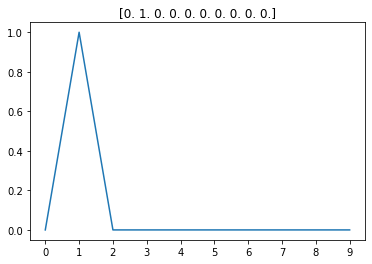

In [17]:
plt.title(y[3])
plt.plot(y[3])
plt.xticks(range(10))

In [0]:
np.random.seed(2020)

- Flatten will transform input 1D array
- Dense Is Fully Connected Layers

## Comple Network
Before Making network ready for training we have to make sure to add below things.
- Loss Function 
- An Optimizer
- Metrics

In [0]:
from tensorflow.keras.layers import Convolution2D, MaxPooling2D,Dropout

In [0]:
epochs = 50
batch_size = 128

In [0]:
model = Sequential()
model.add(Convolution2D(64, kernel_size=(3,3), activation = 'relu', input_shape= (28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Convolution2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Convolution2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [0]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [0]:
model.optimizer.lr = 0.01

In [24]:
print(f'InputShape : {model.input_shape}')
print(f'outputShape :{model.output_shape}')

InputShape : (None, 28, 28, 1)
outputShape :(None, 10)


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [0]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [27]:
history = model.fit(train_x, train_y, validation_data = (val_x, val_y), epochs=epochs, batch_size=batch_size)

Epoch 1/50
329/329 [==============================] - 3s 8ms/step - loss: 1.3482 - accuracy: 0.7998 - val_loss: 0.1973 - val_accuracy: 0.9459
Epoch 2/50
329/329 [==============================] - 2s 7ms/step - loss: 0.1966 - accuracy: 0.9438 - val_loss: 0.2206 - val_accuracy: 0.9359
Epoch 3/50
329/329 [==============================] - 2s 7ms/step - loss: 0.1755 - accuracy: 0.9502 - val_loss: 0.1904 - val_accuracy: 0.9448
Epoch 4/50
329/329 [==============================] - 2s 7ms/step - loss: 0.1645 - accuracy: 0.9547 - val_loss: 0.1891 - val_accuracy: 0.9500
Epoch 5/50
329/329 [==============================] - 2s 7ms/step - loss: 0.1618 - accuracy: 0.9555 - val_loss: 0.1786 - val_accuracy: 0.9598
Epoch 6/50
329/329 [==============================] - 2s 7ms/step - loss: 0.1631 - accuracy: 0.9559 - val_loss: 0.2560 - val_accuracy: 0.9338
Epoch 7/50
329/329 [==============================] - 2s 7ms/step - loss: 0.1487 - accuracy: 0.9605 - val_loss: 0.1607 - val_accuracy: 0.9613
Epoch 

In [28]:
model.save("mnistModel.h5")
print("Saved model to disk")

Saved model to disk
